In [1]:
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from keras.metrics import RootMeanSquaredError

# Load the dataset
microsoft = pd.read_csv('MicrosoftStock.csv')

# Convert 'date' to datetime
microsoft['date'] = pd.to_datetime(microsoft['date'])

# Display the first few rows of the dataset
print(microsoft.head())


ModuleNotFoundError: No module named 'pandas'

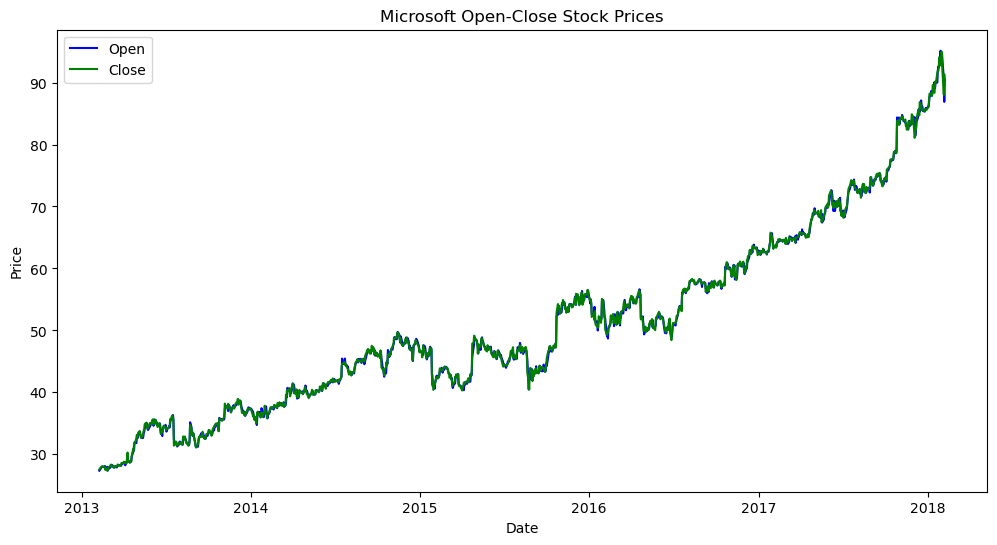

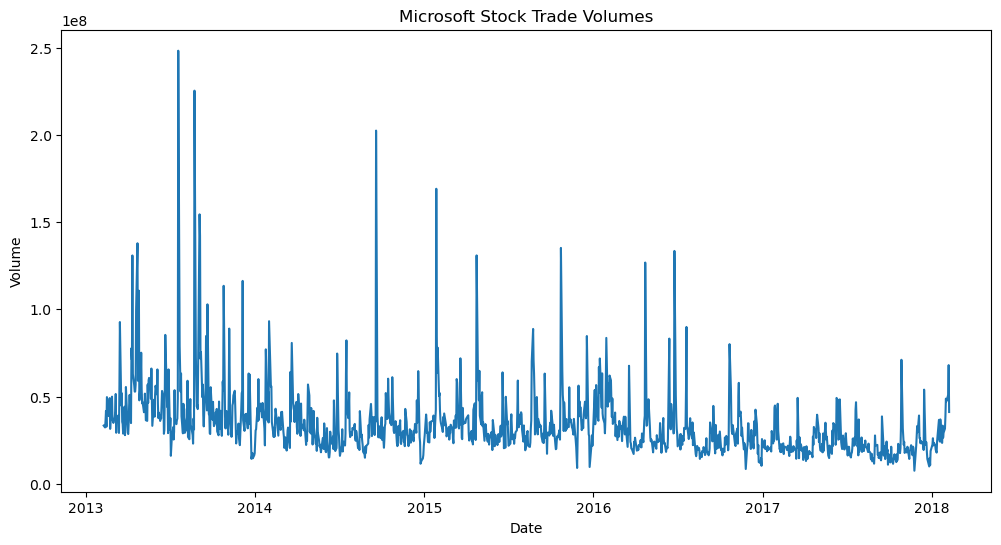

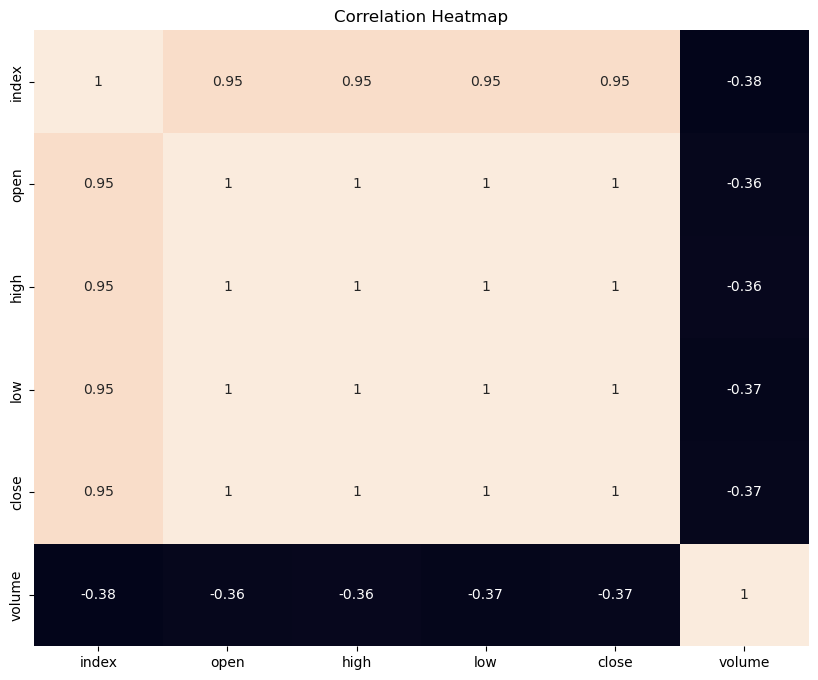

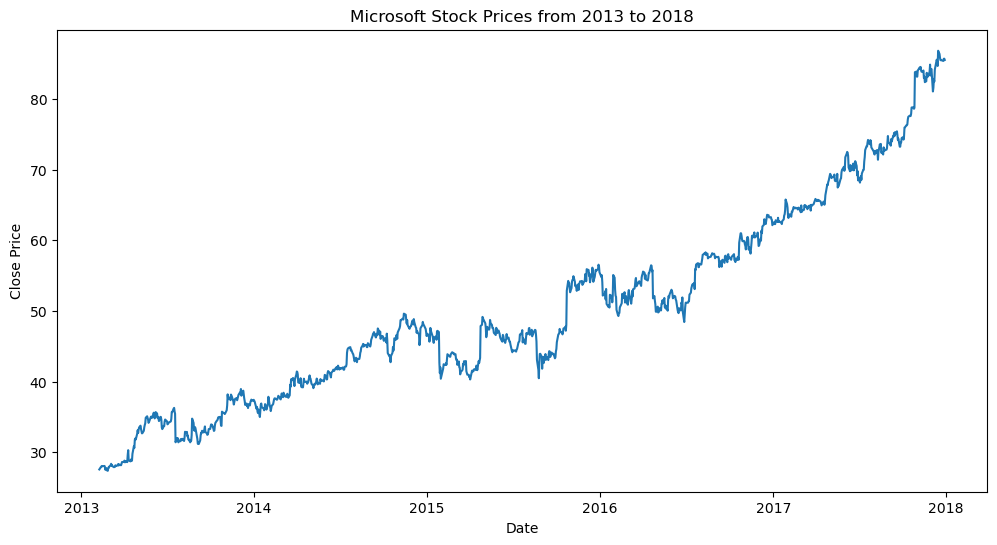

In [ ]:
# Plot Open and Close Prices
plt.figure(figsize=(12, 6))
plt.plot(microsoft['date'], microsoft['open'], color="blue", label="Open")
plt.plot(microsoft['date'], microsoft['close'], color="green", label="Close")
plt.title("Microsoft Open-Close Stock Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

# Plot Trade Volumes
plt.figure(figsize=(12, 6))
plt.plot(microsoft['date'], microsoft['volume'])
plt.title("Microsoft Stock Trade Volumes")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.show()

# Correlation heatmap
numeric_microsoft = microsoft.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_microsoft.corr(), annot=True, cbar=False)
plt.title("Correlation Heatmap")
plt.show()

# Plot Close Prices from 2013 to 2018
prediction = microsoft.loc[(microsoft['date'] > datetime(2013, 1, 1)) & (microsoft['date'] < datetime(2018, 1, 1))]
plt.figure(figsize=(12, 6))
plt.plot(prediction['date'], prediction['close'])
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("Microsoft Stock Prices from 2013 to 2018")
plt.show()


In [ ]:
# Prepare the training set samples
msft_close = microsoft.filter(['close'])
dataset = msft_close.values
training_data_len = int(np.ceil(len(dataset) * 0.95))

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataset)

# Create training data
train_data = scaled_data[:training_data_len, :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
X_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


In [ ]:
# Build the model
model = keras.models.Sequential()
model.add(keras.layers.LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(keras.layers.LSTM(units=64))
model.add(keras.layers.Dense(128))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1))

# Print model summary
print(model.summary())

# Compile the model
model.compile(optimizer='adam', loss='mae', metrics=[RootMeanSquaredError()])

# Train the model
history = model.fit(X_train, y_train, epochs=20)


F:\anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,369 (228.00 KB)

 Trainable params: 58,369 (228.00 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.3209 - root_mean_squared_error: 0.4450
Epoch 2/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.1127 - root_mean_squared_error: 0.1526
Epoch 3/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.1127 - root_mean_squared_error: 0.1468
Epoch 4/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0921 - root_mean_squared_error: 0.1245
Epoch 5/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0925 - root_mean_squared_error: 0.1247
Epoch 6/20
 3/36 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0904 - root_mean_squared_error: 0.1278